# Titanic: Machine Learning from Disaster


- 문제 파악 
- 데이타 획득 
- 데이타 분석
- Feature engineering
- 모델링
- 테스팅 

In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

## 1. 문제 파악

타이타닉호의 생존자를 예측해라

In [2]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## 2. 데이타 획득

kaggle ( https://www.kaggle.com/c/titanic/data )  

### load train, test dataset using Pandas

In [3]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

## 3. 데이타 분석


### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

In [8]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

(None, None)

In [11]:
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [ ]:
def

### 시각화( visualization )

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [14]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

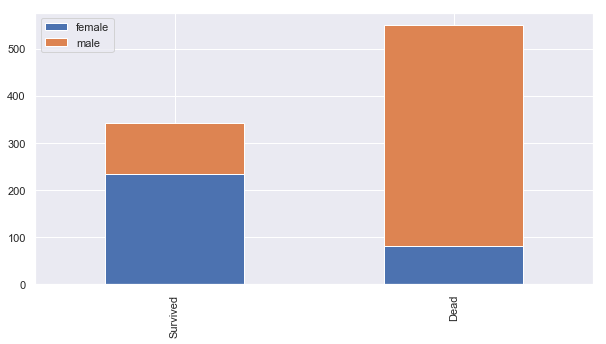

In [15]:
bar_chart('Sex')

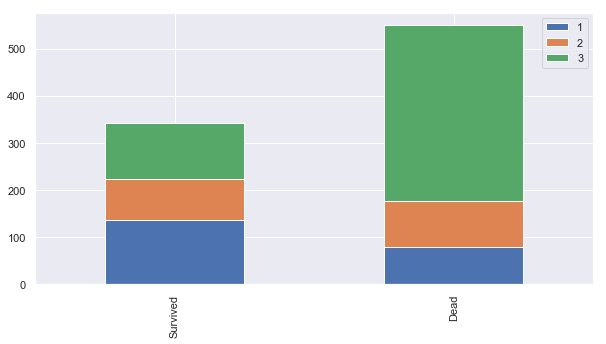

In [16]:
bar_chart('Pclass')

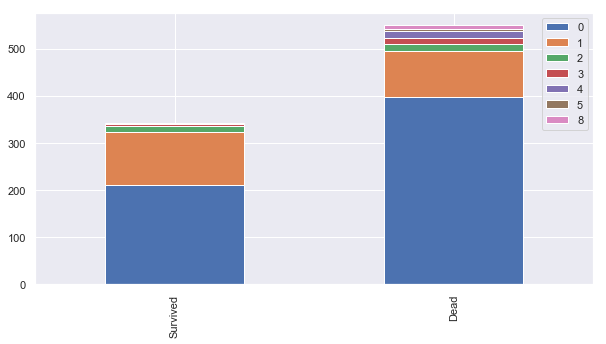

In [17]:
bar_chart('SibSp')

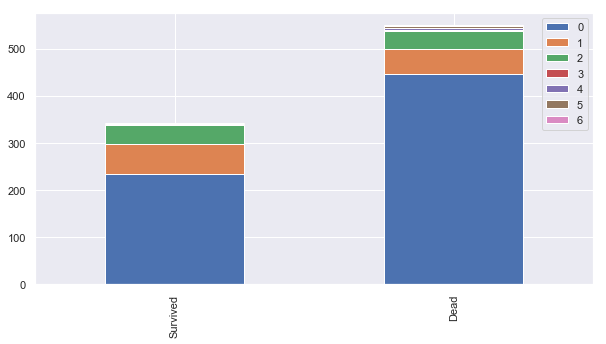

In [18]:
bar_chart('Parch')

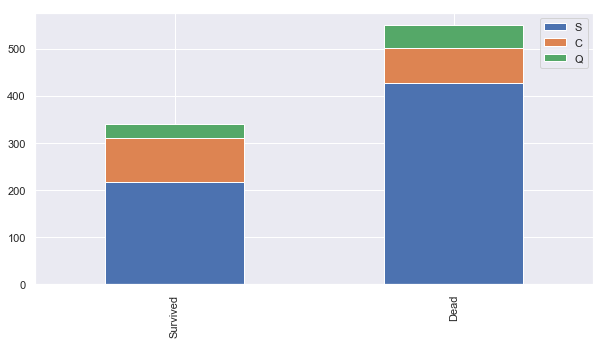

In [19]:
bar_chart('Embarked')

The Chart confirms **a person aboarded from C** slightly more likely survived  
The Chart confirms **a person aboarded from Q** more likely dead  
The Chart confirms **a person aboarded from S** more likely dead

# 전처리( Feature engineering)


## how titanic sank?

sank from the bow of the ship where third class rooms located  
conclusion, Pclass is key feature for classifier

In [22]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

### Name 전처리

- Name 컬럼에서 의미있는 단어 찾기 

In [20]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [21]:
train_test_data = [train,test]

for dataset in train_test_data :
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+).', expand = False)

#### 숫자로 분류시키기 (Title map) => title 컬럼
Mr : 0  
Miss : 1  
Mrs: 2  
Others: 3


In [24]:
title_mapping= {"Mr":0, "Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mlle":3,"Countess":3,"Ms":1,"Lady":1,"Jonkheer":3,"Don":0,"Dona":1,"Mme":2,"Capt":3,"Sir":0}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [27]:
train.drop('Name',axis=1, inplace=True)
test.drop('Name',axis=1, inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,NaN


### Sex 전처리 

male: 0
female: 1

In [30]:
sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

### Age 전처리 

- 누락값 NaN
- 연속데이타를 카테고리화 

## Age & Survied  - FacetGrid 시각화

## Age 카테고리화 

- 구간 분류 후 숫자값으로 채우기 
Binning/Converting Numerical Age to Categorical Variable  

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

##  Embarked 전처리 

- Embarked는 종속변수?

##  filling missing values

** embark Missing Value


more than 50% of 1st class are from S embark  
more than 50% of 2nd class are from S embark  
more than 50% of 3rd class are from S embark

Result =? S

###  Fare 전처리

- NaN 
- 카테고리화 

#### Feature Scale

```
0 : Fare <=17
1 : 17 < Fare <= 30
2 : 30 < Fare <= 100
3 : 100 < Fare 
```

### Cabin

- NaN
- Pclass와 상관관계

In [70]:
# train.Cabin.value_counts()

#### Cabin 숫자화 

- A: 0, B: 0.4, C: 0.8, D: 1.2, 
- E: 1.6, F: 2, G: 2.4, T: 2.8


### FamilySize(SibSp+Parch)

- SibSp : Sibling + Spouse
- Parch : Parents + Child
- SibSp + Parch = FmailySize

## columns drop

# Modelling

- pip install sklearn (Anaconda X)


In [91]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

#  Cross Validation (K-fold)


- 모델을 평가하는 방법
- 교차검증 => 과적합 해결 
- 고정된 train set과 test set으로 평가를 하고, 반복적으로 모델을 튜닝하다보면 test set에만 과적합(Overfit)이 된다. 
- 과적합을 해결하는 검증 데이타 생성 방법
- 전체 데이터 셋을 k개의 subset으로 나누고 k번의 평가를 실행. 이 때 test set을 중복 없이 바꾸어가면서 평가를 진행한다.


In [228]:
Image(url="http://www.ibric.org/upload/geditor/201701/0.33966100_1485242514.png")

In [231]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# 10개로 나누 경우 
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## kNN

- k-최근접 이웃 알고리즘
- 새로운 데이터를 입력받았을때 가장 가까이 있는 것은 무엇일까?

In [248]:
Image(url='https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile28.uf.tistory.com%2Fimage%2F99631D335A165F182D00A7')

In [249]:
cross_val_score?

## Decision Tree

- 의사결정나무
- 질문을 던져서 대상을 좁혀나가는 스무고개 놀이와 비슷한 개념

In [257]:
Image(url="https://miro.medium.com/max/875/0*DKVni_-q7dAKVel7.png")

## Ramdom Forest

- 다수의 결정 트리로부터 분류 또는 평균 예측치(회귀 분석)를 출력

In [260]:
Image(url="https://upload.wikimedia.org/wikipedia/commons/3/36/%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8_%ED%95%99%EC%8A%B5%EA%B3%BC%EC%A0%95_%EB%B0%B0%EA%B9%85.png")

## Naive Bayes

- 나이브 베이즈 분류(Naïve Bayes Classification)
- 베이즈 정리를 적용한 확률 분류기


## SVM

- 서포트 벡터 머신(support vector machine)
-  두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어졌을 때, SVM 알고리즘은 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지 판단한다.

In [263]:
Image(url="https://eight2late.files.wordpress.com/2016/12/svm-fig-1.png?w=700")

# Testing


## csv 파일로 결과파일 저장하기

## 사용자정의 결과 예측하기 

## 함수화 